Época [1/10], Pérdida: 0.8020
Época [2/10], Pérdida: 0.6257
Época [3/10], Pérdida: 0.5326
Época [4/10], Pérdida: 0.4563
Época [5/10], Pérdida: 0.4091
Época [6/10], Pérdida: 0.3542
Época [7/10], Pérdida: 0.3173
Época [8/10], Pérdida: 0.2820
Época [9/10], Pérdida: 0.2548
Época [10/10], Pérdida: 0.2252
Exactitud en la Prueba: 0.9425


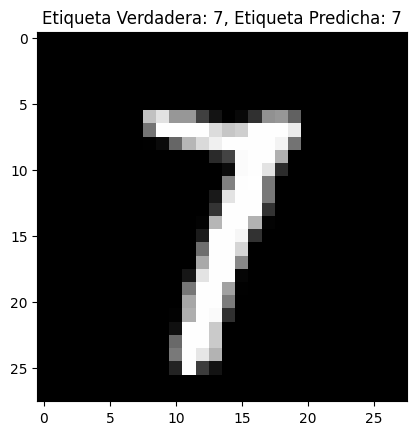

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Cargar el conjunto de datos EMNIST desde el archivo CSV
emnist_data = pd.read_csv('/content/sample_data/mnist_test.csv', header=None)
emnist_data = emnist_data.values

# Separar características y etiquetas
X = emnist_data[:, 1:] / 255.0  # Normalizar los valores de píxeles a [0, 1]
y = emnist_data[:, 0]

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir los datos a tensores de PyTorch
X_entrenamiento_tensor = torch.tensor(X_entrenamiento, dtype=torch.float32)
y_entrenamiento_tensor = torch.tensor(y_entrenamiento, dtype=torch.long)
X_prueba_tensor = torch.tensor(X_prueba, dtype=torch.float32)
y_prueba_tensor = torch.tensor(y_prueba, dtype=torch.long)

# Definir el modelo de la red neuronal con 2 capas ocultas
class RedNeuronal(nn.Module):
    def __init__(self):
        super(RedNeuronal, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)  # Nueva capa oculta
        self.fc4 = nn.Linear(32, 47)  # 47 clases en EMNIST

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))  # Pasar por la nueva capa oculta
        x = self.fc4(x)
        return x

# Crear una instancia del modelo
modelo = RedNeuronal()

# Definir función de pérdida y optimizador
criterio = nn.CrossEntropyLoss()
optimizador = optim.Adam(modelo.parameters(), lr=0.001)

# Ciclo de entrenamiento
num_epocas = 10
tamaño_lote = 64
for epoca in range(num_epocas):
    for i in range(0, len(X_entrenamiento_tensor), tamaño_lote):
        lote_X = X_entrenamiento_tensor[i:i+tamaño_lote]
        lote_y = y_entrenamiento_tensor[i:i+tamaño_lote]

        optimizador.zero_grad()
        salidas = modelo(lote_X)
        pérdida = criterio(salidas, lote_y)
        pérdida.backward()
        optimizador.step()

    print(f'Época [{epoca+1}/{num_epocas}], Pérdida: {pérdida.item():.4f}')

# Evaluar el modelo
modelo.eval()
with torch.no_grad():
    salidas = modelo(X_prueba_tensor)
    _, predichos = torch.max(salidas, 1)
    exactitud = torch.sum(predichos == y_prueba_tensor).item() / len(y_prueba_tensor)
    print(f'Exactitud en la Prueba: {exactitud:.4f}')

    # Visualizar resultados
    muestra_idx = np.random.randint(len(X_prueba_tensor))
    muestra_img = X_prueba_tensor[muestra_idx].view(28, 28)
    etiqueta_verdad = y_prueba_tensor[muestra_idx].item()
    etiqueta_predicha = predichos[muestra_idx].item()

    plt.imshow(muestra_img, cmap='gray')
    plt.title(f'Etiqueta Verdadera: {etiqueta_verdad}, Etiqueta Predicha: {etiqueta_predicha}')
    plt.show()
